In [1]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv(r"D:\Mobiles Dataset (2025).csv", encoding='ISO-8859-1')
df.head()


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [6]:
duplicate_count = df.duplicated(keep=False).sum()
print(f"There are {duplicate_count} rows to be removed")
df = df.drop_duplicates()

There are 30 rows to be removed


In [7]:
# The fields number 0, 1, 6 and 14 (Company Name, Model Name, Processor, Launched Year):
# Convert some columns to categorical type
categorical_cols = ["Company Name", "Model Name", "Processor"]
df[categorical_cols] = df[categorical_cols].astype("category")

df["Launched Year"] = pd.to_datetime(df["Launched Year"], format="%Y").dt.year.astype('Int64')
#df['Launched Year'] = df['Launched Year'].dt.year.astype('Int64')

In [8]:
# Lets show values for the columns below and see how to handle them
original_columns = [
    "Mobile Weight", "RAM", "Front Camera",
    "Back Camera", "Battery Capacity", "Screen Size", "Model Name"
]

df_sample = df.sample(10, random_state=42)

# Display unique values for each original column
for col in original_columns:
    print(f"Unique values in {col}:\n", sorted(df_sample[col].dropna().unique()), "\n")

Unique values in Mobile Weight:
 ['168g', '173g', '193g', '194g', '195g', '196g', '206g', '460g', '520g', '533g'] 

Unique values in RAM:
 ['12GB', '16GB', '4GB', '6GB', '8GB'] 

Unique values in Front Camera:
 ['12MP / 4K', '16MP', '2MP', '32MP', '8MP'] 

Unique values in Back Camera:
 ['12.2MP', '13MP', '48MP + 12MP', '50MP', '50MP + 2MP', '50MP + 64MP + 8MP', '5MP', '64MP + 2MP'] 

Unique values in Battery Capacity:
 ['3,700mAh', '4,200mAh', '4,700mAh', '4500mAh', '5,000mAh', '5,100mAh', '5,200mAh', '8360mAh', '9510mAh'] 

Unique values in Screen Size:
 ['10.1 inches', '11 inches', '11.6 inches', '6.1 inches', '6.3 inches', '6.55 inches', '6.6 inches', '6.7 inches', '6.74 inches', '6.8 inches'] 

Unique values in Model Name:
 ['Edge 50 Fusion 256GB', 'F25 Pro 128GB', 'Moto G Stylus 5G 256GB', 'Note 60 256GB', 'Pad 3 128GB', 'Pad 6', 'Pad Neo 256GB', 'Pixel 4 XL 64GB', 'Reno10 Pro+ 5G 256GB', 'iPhone 14 Pro 128GB'] 



In [9]:
# Field number 2 (Mobile Weight):
# Remove the "g" suffix and convert to float
df["Mobile Weight (g)"] = df["Mobile Weight"].str.replace("g", "", regex=True).astype(float)

print(df[['Mobile Weight', 'Mobile Weight (g)']].head())
df.drop(columns=['Mobile Weight'], inplace=True)

  Mobile Weight  Mobile Weight (g)
0          174g              174.0
1          174g              174.0
2          174g              174.0
3          203g              203.0
4          203g              203.0


In [10]:
# Field number 3 (RAM):
# Remove the "GB" suffix and convert to int
def clean_ram(value):
    value = value.replace("GB", "").strip()  # Remove "GB"
    if "/" in value:  
        return int(max(map(float, value.split("/"))))  # Take the highest value and convert to int
    return int(float(value))  # Convert to int

# Apply function to clean RAM values and convert to integer
df["RAM (GB)"] = df["RAM"].apply(clean_ram).astype(int)

print(df[["RAM", "RAM (GB)"]].head())
df.drop(columns=['RAM'], inplace=True)

   RAM  RAM (GB)
0  6GB         6
1  6GB         6
2  6GB         6
3  6GB         6
4  6GB         6


In [11]:
# Field number 4 (Front Camera):
# Remove the "MP" suffix and convert to int
def clean_front_camera(value):
    if pd.isna(value):
        return 0  # Replace NaN with 0
    
    # Extract all numeric MP values
    mp_values = [float(num) for num in re.findall(r'(\d+\.?\d*)MP', str(value))]
    
    if not mp_values:
        return 0  # Return 0 if no valid MP values
    
    # Ignore 4K mentions (assumed to be video recording)
    return int(max(mp_values)) if "4K" in str(value) else int(max(mp_values))

# Apply function to clean battery capacity
df['Front Camera (MP)'] = df['Front Camera'].apply(clean_front_camera).astype(int)

# ✅ Now the column is cleaned and converted to integer
print(df[['Front Camera', 'Front Camera (MP)']].head())
df.drop(columns=['Front Camera'], inplace=True)

  Front Camera  Front Camera (MP)
0         12MP                 12
1         12MP                 12
2         12MP                 12
3         12MP                 12
4         12MP                 12


In [12]:
def extract_back_cameras(value):
    # Find all megapixel values in the format "XXMP"
    mp_values = [float(num) for num in re.findall(r'(\d+\.?\d*)MP', str(value))]

    # Ensure we have exactly 4 values, filling missing ones with 0
    while len(mp_values) < 4:
        mp_values.append(0)
    
    return mp_values[:4]

# Apply function and store results in new columns
df[['Main Camera (MP)', 'Ultra-wide Camera (MP)', 'Telephoto Camera (MP)', 'Macro Camera (MP)']] = \
    df['Back Camera'].apply(lambda x: pd.Series(extract_back_cameras(x)))

# Convert new columns to integer type (with zeros instead of NaN)
for col in ['Main Camera (MP)', 'Ultra-wide Camera (MP)', 'Telephoto Camera (MP)', 'Macro Camera (MP)']:
    df[col] = df[col].astype(int)

# ✅ Now, these new columns are added to df without affecting other columns.
print(df[['Back Camera', 'Main Camera (MP)', 'Ultra-wide Camera (MP)', 'Telephoto Camera (MP)', 'Macro Camera (MP)']].head())
df.drop(columns=['Back Camera'], inplace=True)

  Back Camera  Main Camera (MP)  Ultra-wide Camera (MP)  \
0        48MP                48                       0   
1        48MP                48                       0   
2        48MP                48                       0   
3        48MP                48                       0   
4        48MP                48                       0   

   Telephoto Camera (MP)  Macro Camera (MP)  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


In [13]:
def clean_battery_capacity(value):
    if pd.isna(value):
        return 0  # Replace NaN with 0
    
    # Remove commas and non-numeric characters except for numbers
    match = re.search(r'(\d+)', str(value).replace(',', ''))
    return int(match.group(1)) if match else 0

# Apply function to clean battery capacity
df['Battery Capacity (mAh)'] = df['Battery Capacity'].apply(clean_battery_capacity).astype(int)

# ✅ Now the column is cleaned and converted to integer
print(df[['Battery Capacity', 'Battery Capacity (mAh)']].head())
df.drop(columns=['Battery Capacity'], inplace=True)

  Battery Capacity  Battery Capacity (mAh)
0         3,600mAh                    3600
1         3,600mAh                    3600
2         3,600mAh                    3600
3         4,200mAh                    4200
4         4,200mAh                    4200


In [14]:

def clean_screen_size(value):
    if pd.isna(value):
        return 0.0  # Replace NaN with 0

    # Extract screen size (both integers and decimals)
    match = re.search(r'(\d+(\.\d+)?)', str(value))  # Captures both "11" and "6.7"
    
    return float(match.group(1)) if match else 0.0

# Apply function to clean screen size
df['Screen Size (inches)'] = df['Screen Size'].apply(clean_screen_size)

# ✅ Now the column is cleaned and converted to numeric format
print(df[['Screen Size', 'Screen Size (inches)']].head())
df.drop(columns=['Screen Size'], inplace=True)

  Screen Size  Screen Size (inches)
0  6.1 inches                   6.1
1  6.1 inches                   6.1
2  6.1 inches                   6.1
3  6.7 inches                   6.7
4  6.7 inches                   6.7


In [15]:
# Extract storage size from Model Name
def extract_storage(model_name):
    match = re.search(r'(\d+)\s*(TB|GB)', model_name, re.IGNORECASE)
    if match:
        value, unit = int(match.group(1)), match.group(2).upper()
        return value * 1000 if unit == "TB" else value
    return None  # Return None if no storage info is found

df['Storage (GB)'] = df['Model Name'].apply(lambda x: extract_storage(str(x)))
df['Storage (GB)'] = df['Storage (GB)'].astype('Int64')  # Keep as integer while allowing NaN values

print(df[['Model Name', 'Storage (GB)']].head())  # Verify results

             Model Name  Storage (GB)
0       iPhone 16 128GB           128
1       iPhone 16 256GB           256
2       iPhone 16 512GB           512
3  iPhone 16 Plus 128GB           128
4  iPhone 16 Plus 256GB           256


In [16]:
# Define price columns
price_columns = [
    'Launched Price (Pakistan)', 'Launched Price (India)',
    'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)'
]

# Melt the DataFrame: Convert wide format into long format
df_melted = df.melt(id_vars=[col for col in df.columns if col not in price_columns], 
                     value_vars=price_columns,
                     var_name="Country", value_name="Price")

# Extract Country from column names
df_melted["Country"] = df_melted["Country"].str.extract(r'Launched Price \((.*?)\)')
df_melted['Country'] = df_melted['Country'].astype("category")

# Now, df_melted has a single "Price" column and a "Country" column
print(df_melted[['Country', 'Price']].head())

# 🔹 Replace the original df with the transformed version
df = df_melted.copy()

    Country        Price
0  Pakistan  PKR 224,999
1  Pakistan  PKR 234,999
2  Pakistan  PKR 244,999
3  Pakistan  PKR 249,999
4  Pakistan  PKR 259,999


In [17]:
def split_currency_price(value):
    if pd.isna(value) or value.strip() == "":
        return pd.NA, pd.NA  # Handle missing values

    match = re.match(r'([A-Za-z]+)\s*([\d,]+)', str(value))  # Extract currency and price
    if match:
        currency = match.group(1)  # Extract currency (e.g., USD, PKR, INR)
        price = match.group(2).replace(',', '')  # Remove commas in numbers
        return currency, float(price)  # Convert price to float
    
    return pd.NA, pd.NA  # If no match, return NaN

# Apply function to split into two new columns
df[['Currency', 'Price (Numeric)']] = df['Price'].apply(lambda x: pd.Series(split_currency_price(x)))

# Now, df has separate 'Currency' and 'Price (Numeric)' columns
print(df[['Country', 'Price', 'Currency', 'Price (Numeric)']].head())

    Country        Price Currency Price (Numeric)
0  Pakistan  PKR 224,999      PKR        224999.0
1  Pakistan  PKR 234,999      PKR        234999.0
2  Pakistan  PKR 244,999      PKR        244999.0
3  Pakistan  PKR 249,999      PKR        249999.0
4  Pakistan  PKR 259,999      PKR        259999.0


In [18]:

df['Currency'] = df['Currency'].astype('category')

# Convert 'Price (Numeric)' to integer
df['Price (Numeric)'] = df['Price (Numeric)'].astype('Int64')  # Supports NaN values

# Drop the original 'Price' column
df.drop(columns=['Price'], inplace=True)

In [19]:
# Display rows where Currency is missing
missing_currency_rows = df[df['Currency'].isna()]
print(missing_currency_rows['Country'])

914     Pakistan
2742       China
Name: Country, dtype: category
Categories (5, object): ['China', 'Dubai', 'India', 'Pakistan', 'USA']


In [20]:
df.loc[df['Country'] == 'Pakistan', 'Currency'] = 'PKR'
df.loc[df['Country'] == 'China', 'Currency'] = 'CNY'

In [21]:
exchange_rates = {
    'PKR': 0.0036,
    'INR': 0.012,
    'CNY': 0.14,
    'USD': 1.0,
    'AED': 0.27
}

# Function to normalize price
def normalize_price(row):
    if pd.isna(row['Price (Numeric)']) or pd.isna(row['Currency']):
        return np.nan  # Keep NaN if no price or currency
    return row['Price (Numeric)'] * exchange_rates.get(row['Currency'], np.nan)

# Apply normalization
df['Normalized Price (USD)'] = df.apply(normalize_price, axis=1)

# ✅ Now the prices are normalized
print(df[['Price (Numeric)', 'Currency', 'Normalized Price (USD)']].head())
# Drop the original 'Price Numeric' column
df.drop(columns=['Price (Numeric)'], inplace=True)

# Drop the currency column as it isn't needed any more
df.drop(columns=['Currency'], inplace=True)

   Price (Numeric) Currency  Normalized Price (USD)
0           224999      PKR                809.9964
1           234999      PKR                845.9964
2           244999      PKR                881.9964
3           249999      PKR                899.9964
4           259999      PKR                935.9964


In [22]:
df.head()


,Company Name,Model Name,Processor,Launched Year,Mobile Weight (g),RAM (GB),Front Camera (MP),Main Camera (MP),Ultra-wide Camera (MP),Telephoto Camera (MP),Macro Camera (MP),Battery Capacity (mAh),Screen Size (inches),Storage (GB),Country,Normalized Price (USD)
0,Apple,iPhone 16 128GB,A17 Bionic,2024,174.0,6,12,48,0,0,0,3600,6.1,128,Pakistan,809.9964
1,Apple,iPhone 16 256GB,A17 Bionic,2024,174.0,6,12,48,0,0,0,3600,6.1,256,Pakistan,845.9964
2,Apple,iPhone 16 512GB,A17 Bionic,2024,174.0,6,12,48,0,0,0,3600,6.1,512,Pakistan,881.9964
3,Apple,iPhone 16 Plus 128GB,A17 Bionic,2024,203.0,6,12,48,0,0,0,4200,6.7,128,Pakistan,899.9964
4,Apple,iPhone 16 Plus 256GB,A17 Bionic,2024,203.0,6,12,48,0,0,0,4200,6.7,256,Pakistan,935.9964


In [27]:
# The normalized price seems to be missing two records, lets investigate and fillin using the average price grouped by country

# Ensure we are working on a copy to avoid SettingWithCopyWarning
df = df.copy()

# Calculate the average Normalized Price per Country
avg_price_per_country = df.groupby('Country', observed=True)['Normalized Price (USD)'].transform('mean')

# Fill missing values safely
df.loc[df['Normalized Price (USD)'].isna(), 'Normalized Price (USD)'] = avg_price_per_country

# Verify if there are still missing values
print(df['Normalized Price (USD)'].isna().sum())  # Should print 0 if all missing values are filled

0


In [28]:
print(df[['Mobile Weight (g)', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Normalized Price (USD)']].describe())

       Mobile Weight (g)  Screen Size (inches)  Battery Capacity (mAh)  \
count        4575.000000           4575.000000             4575.000000   
mean          228.914098              7.092678             5030.280874   
std           106.118502              1.543902             1364.974602   
min           135.000000              5.000000             2000.000000   
25%           185.000000              6.500000             4400.000000   
50%           195.000000              6.670000             5000.000000   
75%           209.000000              6.780000             5100.000000   
max           732.000000             14.600000            11200.000000   

       Normalized Price (USD)  
count             4575.000000  
mean               566.419094  
std                716.741388  
min                 57.596400  
25%                239.988000  
50%                404.730000  
75%                799.000000  
max              39622.000000  


In [29]:
df[df['Mobile Weight (g)'] == 732]['Model Name'].unique()


['Galaxy Tab S9 Ultra 256GB']
Categories (908, object): ['10X Lite', '13 5G 128GB', '13 5G 256GB', '13 Pro 5G 128GB', ..., 'iPhone XS Max 256GB', 'iPhone XS Max 512GB', 'iPhone XS Max 64GB', 'iQOO 12 256GB']

In [30]:
df[(df['Screen Size (inches)'] == 14.6) | (df['Mobile Weight (g)'] == 732)][['Model Name', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Mobile Weight (g)']].drop_duplicates()

,Model Name,Screen Size (inches),Battery Capacity (mAh),Mobile Weight (g)
166,Galaxy Tab S9 Ultra 256GB,14.6,11200,732.0
170,Galaxy Tab S8 Ultra 256GB,14.6,11200,726.0


In [31]:
# Lets investigate the max price of 39622, it is most likely to be an input error
df[df['Normalized Price (USD)'] == 39622][['Model Name','Processor', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Normalized Price (USD)']].drop_duplicates()

,Model Name,Processor,Screen Size (inches),Battery Capacity (mAh),Normalized Price (USD)
3416,T21,Unisoc T612,10.4,8200,39622.0


In [32]:
# Filter dataset for similar products (same processor, screen size close to 10.4 inches, and battery capacity close to 8200 mAh)
similar_products = df[
    (df['Processor'] == 'Unisoc T612') & 
    (df['Screen Size (inches)'] == 10.4) &  # Screen size around 10.4 inches
    (df['Battery Capacity (mAh)'] == 8200)  # Battery capacity around 8200 mAh
]

# Display the filtered dataset with similar products
print(similar_products[['Model Name', 'Processor', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Normalized Price (USD)']])

# Alternatively, you can check the price statistics of the similar products
print(similar_products['Normalized Price (USD)'].describe())

     Model Name    Processor  Screen Size (inches)  Battery Capacity (mAh)  \
671         T21  Unisoc T612                  10.4                    8200   
1586        T21  Unisoc T612                  10.4                    8200   
2501        T21  Unisoc T612                  10.4                    8200   
3416        T21  Unisoc T612                  10.4                    8200   
4331        T21  Unisoc T612                  10.4                    8200   

      Normalized Price (USD)  
671                  187.200  
1586                 215.988  
2501                 175.000  
3416               39622.000  
4331                 234.900  
count        5.000000
mean      8087.017600
std      17628.606818
min        175.000000
25%        187.200000
50%        215.988000
75%        234.900000
max      39622.000000
Name: Normalized Price (USD), dtype: float64


In [33]:
# It seems like the $39622 is really an input error, lets deal with it

# Step 1: Remove the outlier
df_filtered = df[(df['Model Name'] != 'T21') | (df['Normalized Price (USD)'] != 39622)]

# Step 2: Group by relevant features and calculate the mean price
grouped = df_filtered.groupby(['Processor', 'Screen Size (inches)', 'Battery Capacity (mAh)'])['Normalized Price (USD)'].mean().reset_index()

# Step 3: Find the correct mean value for the T21 outlier
mean_price = grouped[(grouped['Processor'] == 'Unisoc T612') & 
                     (grouped['Screen Size (inches)'] == 10.4) & 
                     (grouped['Battery Capacity (mAh)'] == 8200)]['Normalized Price (USD)'].values[0]

# Step 4: Update the outlier's price
df.loc[(df['Model Name'] == 'T21') & (df['Normalized Price (USD)'] == 39622), 'Normalized Price (USD)'] = mean_price

# Step 5: Verify the update
updated_price = df[df['Model Name'] == 'T21'][['Model Name', 'Processor', 'Screen Size (inches)', 'Battery Capacity (mAh)', 'Normalized Price (USD)']]
print(updated_price)

C:\Users\HP\AppData\Local\Temp\ipykernel_10560\3390642173.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_filtered.groupby(['Processor', 'Screen Size (inches)', 'Battery Capacity (mAh)'])['Normalized Price (USD)'].mean().reset_index()


     Model Name    Processor  Screen Size (inches)  Battery Capacity (mAh)  \
671         T21  Unisoc T612                  10.4                    8200   
1586        T21  Unisoc T612                  10.4                    8200   
2501        T21  Unisoc T612                  10.4                    8200   
3416        T21  Unisoc T612                  10.4                    8200   
4331        T21  Unisoc T612                  10.4                    8200   

      Normalized Price (USD)  
671                  187.200  
1586                 215.988  
2501                 175.000  
3416                 203.272  
4331                 234.900  


In [34]:
df['log_normalized_price'] = np.log(df['Normalized Price (USD)'])


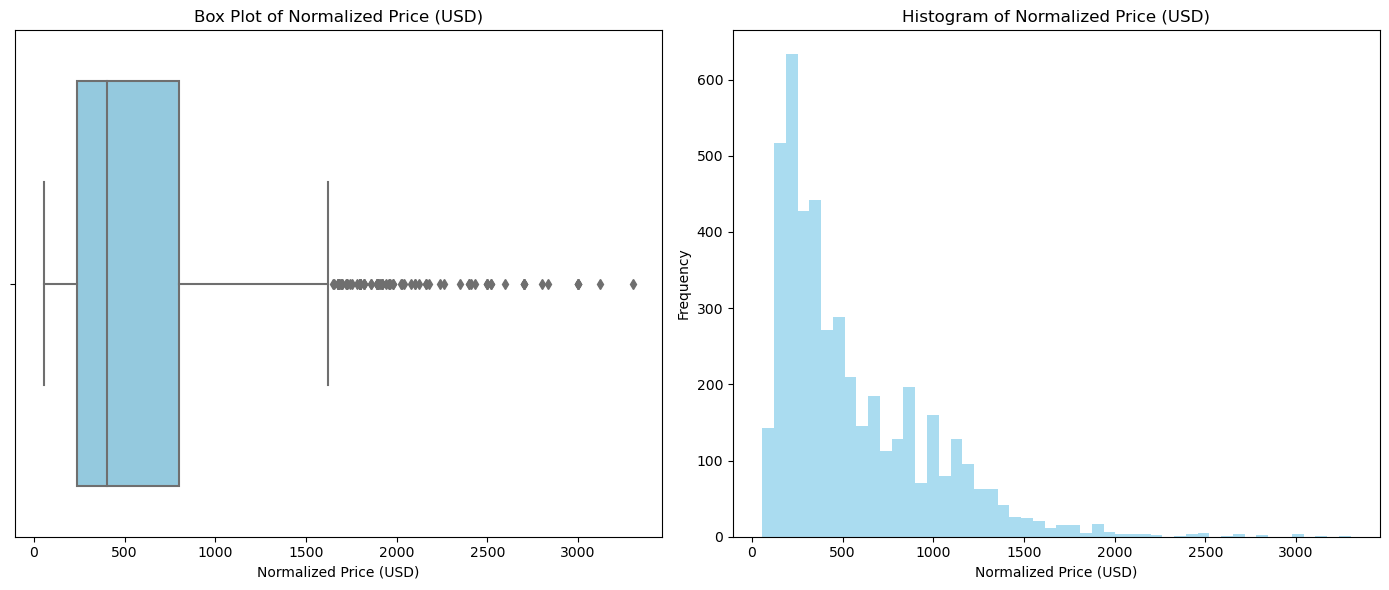

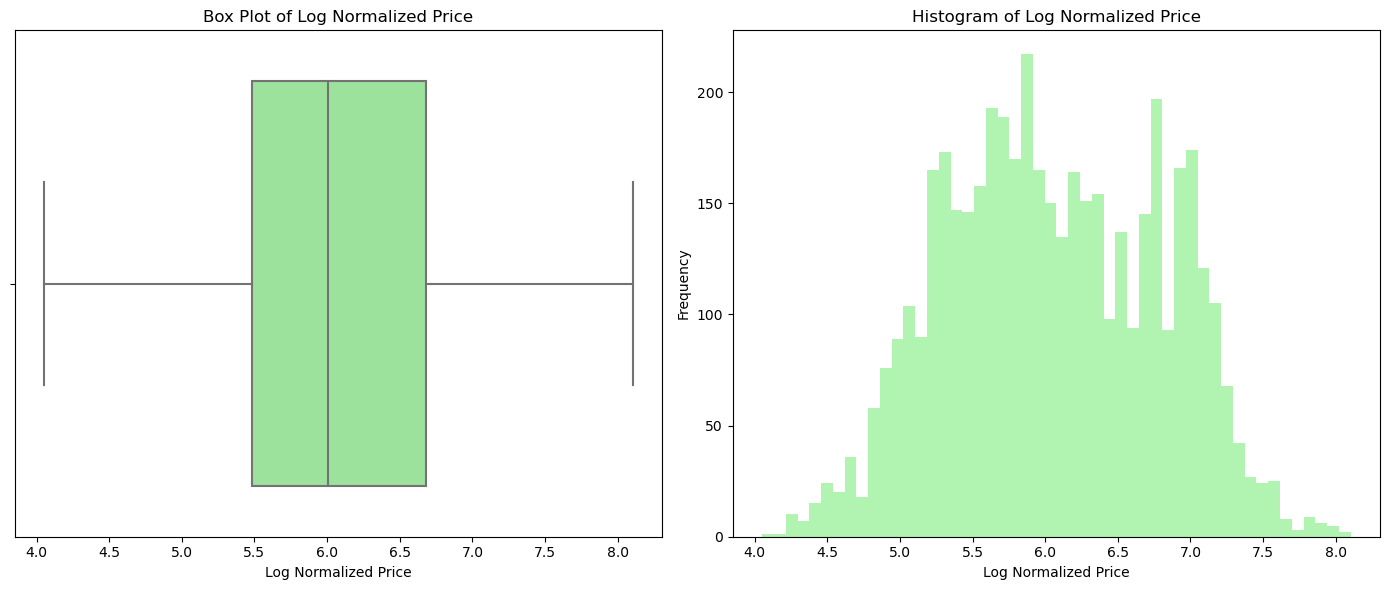

In [35]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Box Plot for Normalized Price (USD)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Normalized Price (USD)', color='skyblue')
plt.title('Box Plot of Normalized Price (USD)')
plt.xlabel('Normalized Price (USD)')

# Histogram for Normalized Price (USD)
plt.subplot(1, 2, 2)
plt.hist(df['Normalized Price (USD)'], bins=50, color='skyblue', alpha=0.7)
plt.title('Histogram of Normalized Price (USD)')
plt.xlabel('Normalized Price (USD)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# Set up another figure for Log Normalized Price
plt.figure(figsize=(14, 6))

# Box Plot for Log Normalized Price
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='log_normalized_price', color='lightgreen')
plt.title('Box Plot of Log Normalized Price')
plt.xlabel('Log Normalized Price')

# Histogram for Log Normalized Price
plt.subplot(1, 2, 2)
plt.hist(df['log_normalized_price'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Histogram of Log Normalized Price')
plt.xlabel('Log Normalized Price')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
missing_count = df['Storage (GB)'].isna().sum()
print(f"Missing Storage (GB) values: {missing_count}")

Missing Storage (GB) values: 760


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Drop missing target values for training
df_train = df.dropna(subset=['Storage (GB)']).copy()

# Define categorical & numerical features
categorical_cols = ['Company Name', 'Model Name', 'Processor', 'Country']
numerical_cols = ['Battery Capacity (mAh)', 'Front Camera (MP)', 'Main Camera (MP)', 
                  'Ultra-wide Camera (MP)', 'Telephoto Camera (MP)', 'Macro Camera (MP)', 
                  'Screen Size (inches)', 'log_normalized_price']

# One-hot encode categorical columns
df_train = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)

# Define features & target
X = df_train.drop(columns=['Storage (GB)'])
y = df_train['Storage (GB)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- XGBoost Model ----
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

xgb_train_mae = mean_absolute_error(y_train, xgb_train_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)

xgb_train_r2 = r2_score(y_train, xgb_train_preds)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)

print("\n🚀 XGBoost Performance:")
print(f"🔹 Train MAE: {xgb_train_mae:.2f} GB")
print(f"🔹 Train R²: {xgb_train_r2:.2f}")
print(f"🔹 Test MAE: {xgb_test_mae:.2f} GB")
print(f"🔹 Test R²: {xgb_test_r2:.2f}")

# ---- Predict Missing Storage (GB) ----
df_missing = df[df['Storage (GB)'].isna()].copy()
df_missing = pd.get_dummies(df_missing, columns=categorical_cols, drop_first=True)

# Ensure test data has the same feature columns
missing_cols = set(X_train.columns) - set(df_missing.columns)
for col in missing_cols:
    df_missing[col] = 0  # Add missing features with zero values

X_missing = df_missing[X_train.columns]

# Use the best-performing model (change model if needed)
df.loc[df['Storage (GB)'].isna(), 'Storage (GB)'] = xgb_model.predict(X_missing).astype(int)
print("✅ Missing Storage (GB) values predicted and updated in the dataset!")


🚀 XGBoost Performance:
🔹 Train MAE: 32.46 GB
🔹 Train R²: 0.94
🔹 Test MAE: 39.31 GB
🔹 Test R²: 0.85
✅ Missing Storage (GB) values predicted and updated in the dataset!


D:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


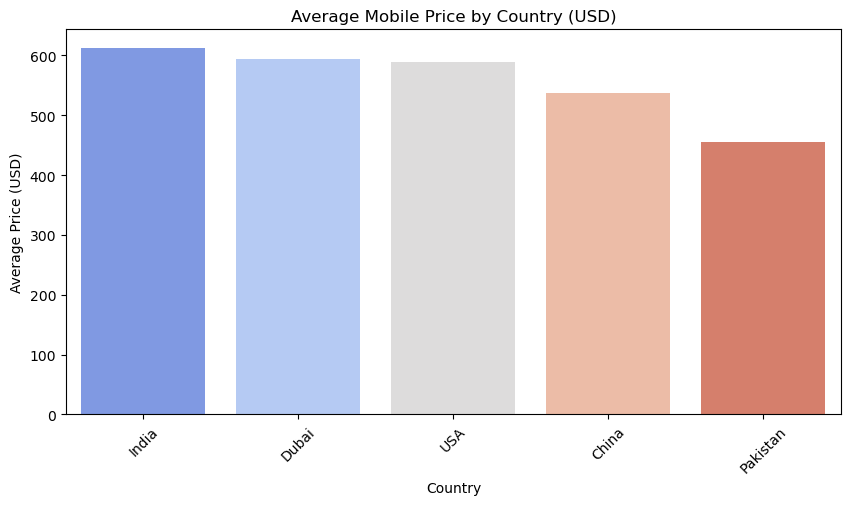

In [38]:
country_avg_price = df.groupby("Country", observed=True)["Normalized Price (USD)"].mean().sort_values(ascending=False)

# Plot country-wise average price in descending order
plt.figure(figsize=(10, 5))
sns.barplot(x=country_avg_price.index, y=country_avg_price.values, order=country_avg_price.index, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Average Mobile Price by Country (USD)")
plt.ylabel("Average Price (USD)")

# Show the plot
plt.show()

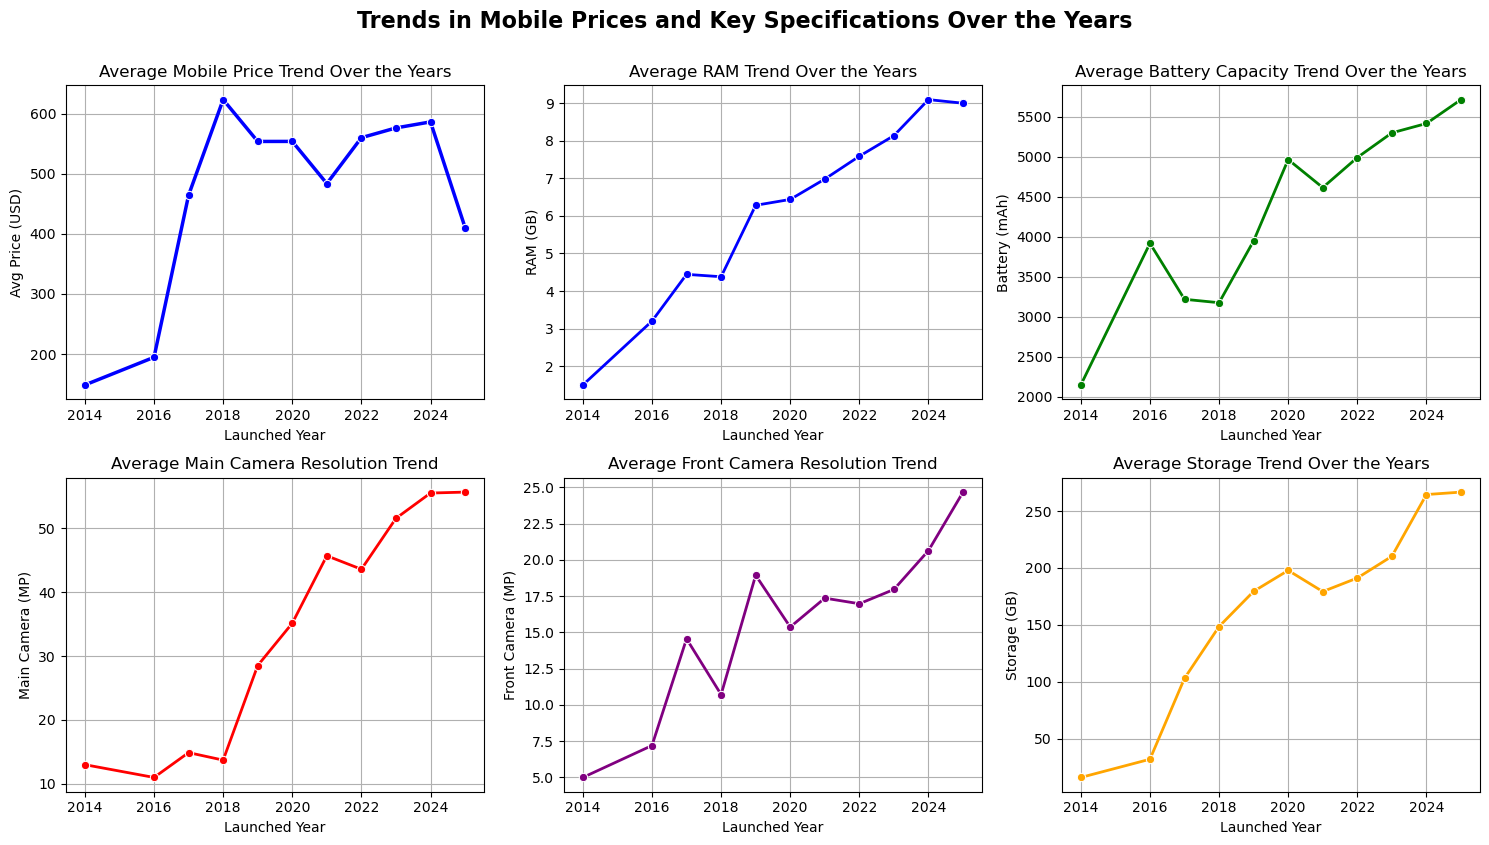

In [39]:
warnings.simplefilter(action="ignore", category=FutureWarning)

# Group by Launched Year and compute average price
yearly_avg_price = df.groupby("Launched Year")["Normalized Price (USD)"].mean()

# Group by Launched Year and compute average values for other specs
yearly_avg_specs = df.groupby("Launched Year").agg({
    "RAM (GB)": "mean",
    "Battery Capacity (mAh)": "mean",
    "Main Camera (MP)": "mean",
    "Front Camera (MP)": "mean",
    "Storage (GB)": "mean"
})

# Set figure size
plt.figure(figsize=(15, 8))

# Plot Price Trend
plt.subplot(2, 3, 1)
sns.lineplot(x=yearly_avg_price.index, y=yearly_avg_price.values, marker="o", linewidth=2.5, color="b")
plt.title("Average Mobile Price Trend Over the Years", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("Avg Price (USD)")
plt.grid(True)

# Plot RAM Trend
plt.subplot(2, 3, 2)
sns.lineplot(x=yearly_avg_specs.index, y=yearly_avg_specs["RAM (GB)"], marker="o", linewidth=2, color="b")
plt.title("Average RAM Trend Over the Years", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("RAM (GB)")
plt.grid(True)

# Plot Battery Capacity Trend
plt.subplot(2, 3, 3)
sns.lineplot(x=yearly_avg_specs.index, y=yearly_avg_specs["Battery Capacity (mAh)"], marker="o", linewidth=2, color="g")
plt.title("Average Battery Capacity Trend Over the Years", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("Battery (mAh)")
plt.grid(True)

# Plot Main Camera Trend
plt.subplot(2, 3, 4)
sns.lineplot(x=yearly_avg_specs.index, y=yearly_avg_specs["Main Camera (MP)"], marker="o", linewidth=2, color="r")
plt.title("Average Main Camera Resolution Trend", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("Main Camera (MP)")
plt.grid(True)

# Plot Front Camera Trend
plt.subplot(2, 3, 5)
sns.lineplot(x=yearly_avg_specs.index, y=yearly_avg_specs["Front Camera (MP)"], marker="o", linewidth=2, color="purple")
plt.title("Average Front Camera Resolution Trend", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("Front Camera (MP)")
plt.grid(True)

# Plot Storage Trend
plt.subplot(2, 3, 6)
sns.lineplot(x=yearly_avg_specs.index, y=yearly_avg_specs["Storage (GB)"], marker="o", linewidth=2, color="orange")
plt.title("Average Storage Trend Over the Years", fontsize=12)
plt.xlabel("Launched Year")
plt.ylabel("Storage (GB)")
plt.grid(True)

plt.tight_layout()
plt.suptitle("Trends in Mobile Prices and Key Specifications Over the Years", fontsize=16, fontweight="bold", y=1.05)
plt.show()


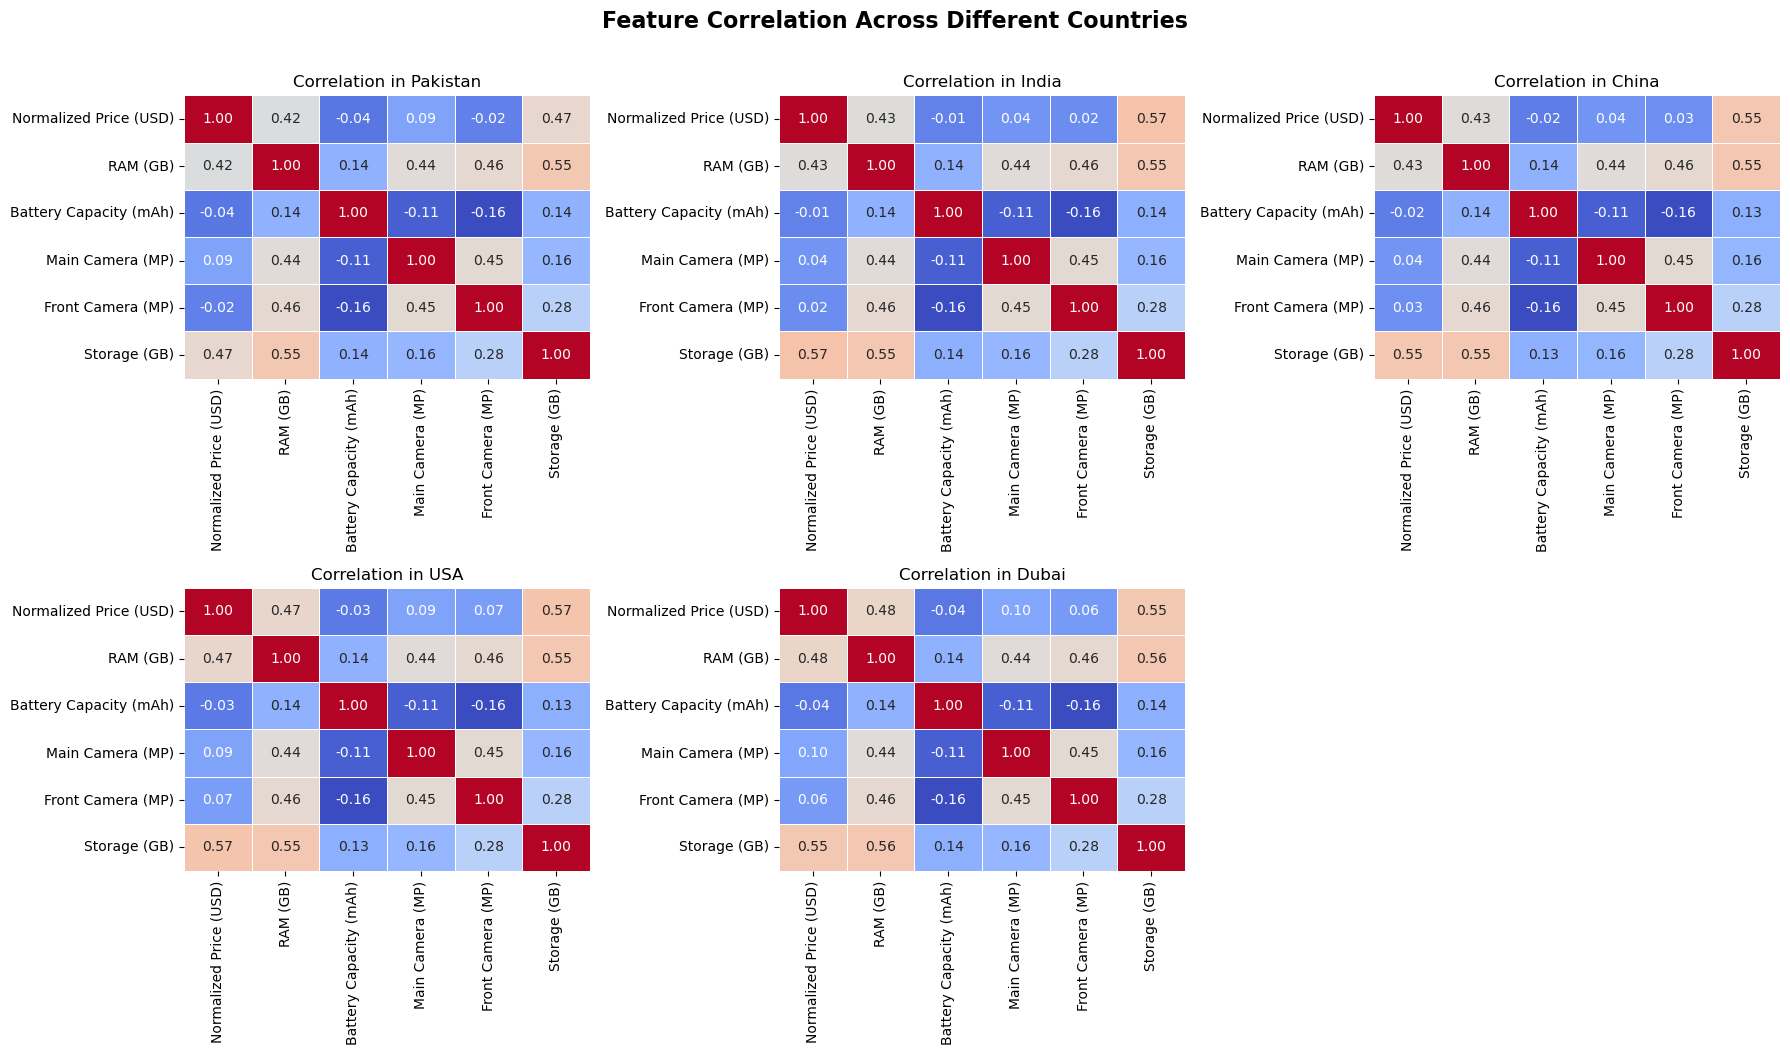

In [40]:
countries = df["Country"].unique()
num_countries = len(countries)

# Define features for correlation
features = ["Normalized Price (USD)", "RAM (GB)", "Battery Capacity (mAh)", 
            "Main Camera (MP)", "Front Camera (MP)", "Storage (GB)"]

# Define subplot grid (max 3 per row)
cols = 3
rows = int(np.ceil(num_countries / cols))

# Set up subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 5 * rows))

# Flatten axes for easier indexing if there are multiple rows
axes = axes.flatten()

# Loop through each country and plot heatmap
for i, country in enumerate(countries):
    country_df = df[df["Country"] == country]

    # Compute correlation matrix
    correlation_matrix = country_df[features].corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
                linewidths=0.5, ax=axes[i], cbar=False)
    axes[i].set_title(f"Correlation in {country}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Feature Correlation Across Different Countries", fontsize=16, fontweight="bold", y=1.05)
plt.show()

In [41]:
weights = {
    "RAM (GB)": 0.25,
    "Battery Capacity (mAh)": 0.15,
    "Main Camera (MP)": 0.15,
    "Front Camera (MP)": 0.10,
    "Ultra-wide Camera (MP)": 0.10,
    "Telephoto Camera (MP)": 0.10,
    "Macro Camera (MP)": 0.10,
    "Storage (GB)": 0.15  # Adjusted weight since Processor Score is removed
}

# Apply weighted formula
df["Specs Score"] = (
    df["RAM (GB)"] * weights["RAM (GB)"] +
    df["Battery Capacity (mAh)"] * weights["Battery Capacity (mAh)"] +
    df["Main Camera (MP)"] * weights["Main Camera (MP)"] +
    df["Front Camera (MP)"] * weights["Front Camera (MP)"] +
    df["Ultra-wide Camera (MP)"] * weights["Ultra-wide Camera (MP)"] +
    df["Telephoto Camera (MP)"] * weights["Telephoto Camera (MP)"] +
    df["Macro Camera (MP)"] * weights["Macro Camera (MP)"] +
    df["Storage (GB)"] * weights["Storage (GB)"]  # Storage added
)

# Compute the specs-to-price ratio
df["Specs-to-Price Ratio"] = df["Specs Score"] / df["Normalized Price (USD)"]

# Aggregate by company
specs_to_price_ratio = df.groupby("Company Name")["Specs-to-Price Ratio"].mean()

# Sort from highest to lowest
sorted_data = specs_to_price_ratio.sort_values(ascending=False)

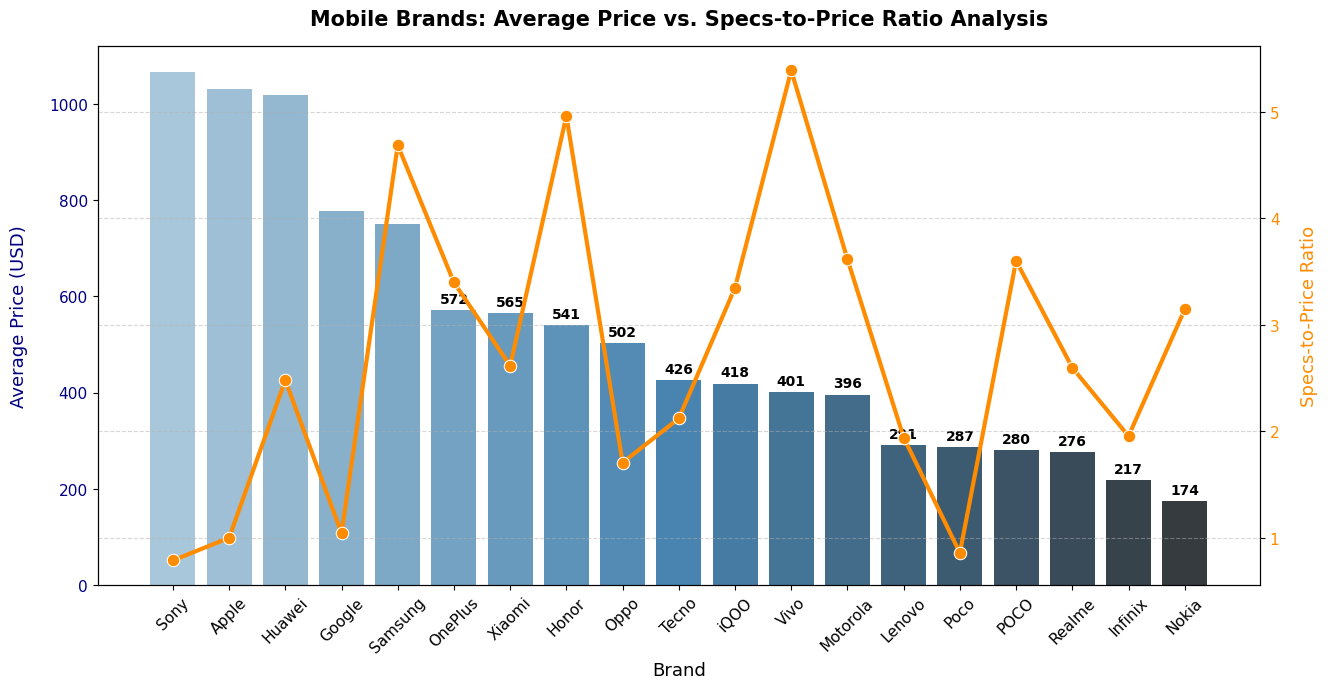

In [42]:
# Step 1: Aggregate data
brand_avg_price = df.groupby("Company Name")["Normalized Price (USD)"].mean()
specs_to_price_ratio = df.groupby("Company Name")["Specs-to-Price Ratio"].mean()

# Step 2: Sort both by average price
sorted_brands = brand_avg_price.sort_values(ascending=False).index
brand_avg_price = brand_avg_price.loc[sorted_brands]
specs_to_price_ratio = specs_to_price_ratio.loc[sorted_brands]

# Step 3: Create figure
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar plot for Average Price (Using a solid blue color)
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, ax=ax1, palette="Blues_d", order=sorted_brands)
ax1.set_ylabel("Average Price (USD)", color="navy", fontsize=13, labelpad=15)
ax1.set_xlabel("Brand", fontsize=13)
ax1.tick_params(axis='y', labelcolor="navy", labelsize=11)
ax1.tick_params(axis='x', rotation=45, labelsize=11)

# Add value labels on bars
for i, v in enumerate(brand_avg_price.values):
    color = "white" if v > 600 else "black"
    ax1.text(i, v + 15, f"{v:.0f}", ha='center', fontsize=10, color=color, fontweight="bold")

# Step 4: Twin y-axis for Specs-to-Price Ratio
ax2 = ax1.twinx()
sns.lineplot(x=specs_to_price_ratio.index, y=specs_to_price_ratio.values, ax=ax2, 
             color="darkorange", marker="o", linestyle="-", linewidth=3, markersize=9)

ax2.set_ylabel("Specs-to-Price Ratio", color="darkorange", fontsize=13, labelpad=15)
ax2.tick_params(axis='y', labelcolor="darkorange", labelsize=11)
ax2.grid(True, linestyle="--", alpha=0.5)

# Step 5: Formatting
ax1.set_title("Mobile Brands: Average Price vs. Specs-to-Price Ratio Analysis", 
              fontsize=15, fontweight="bold", pad=15)

plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


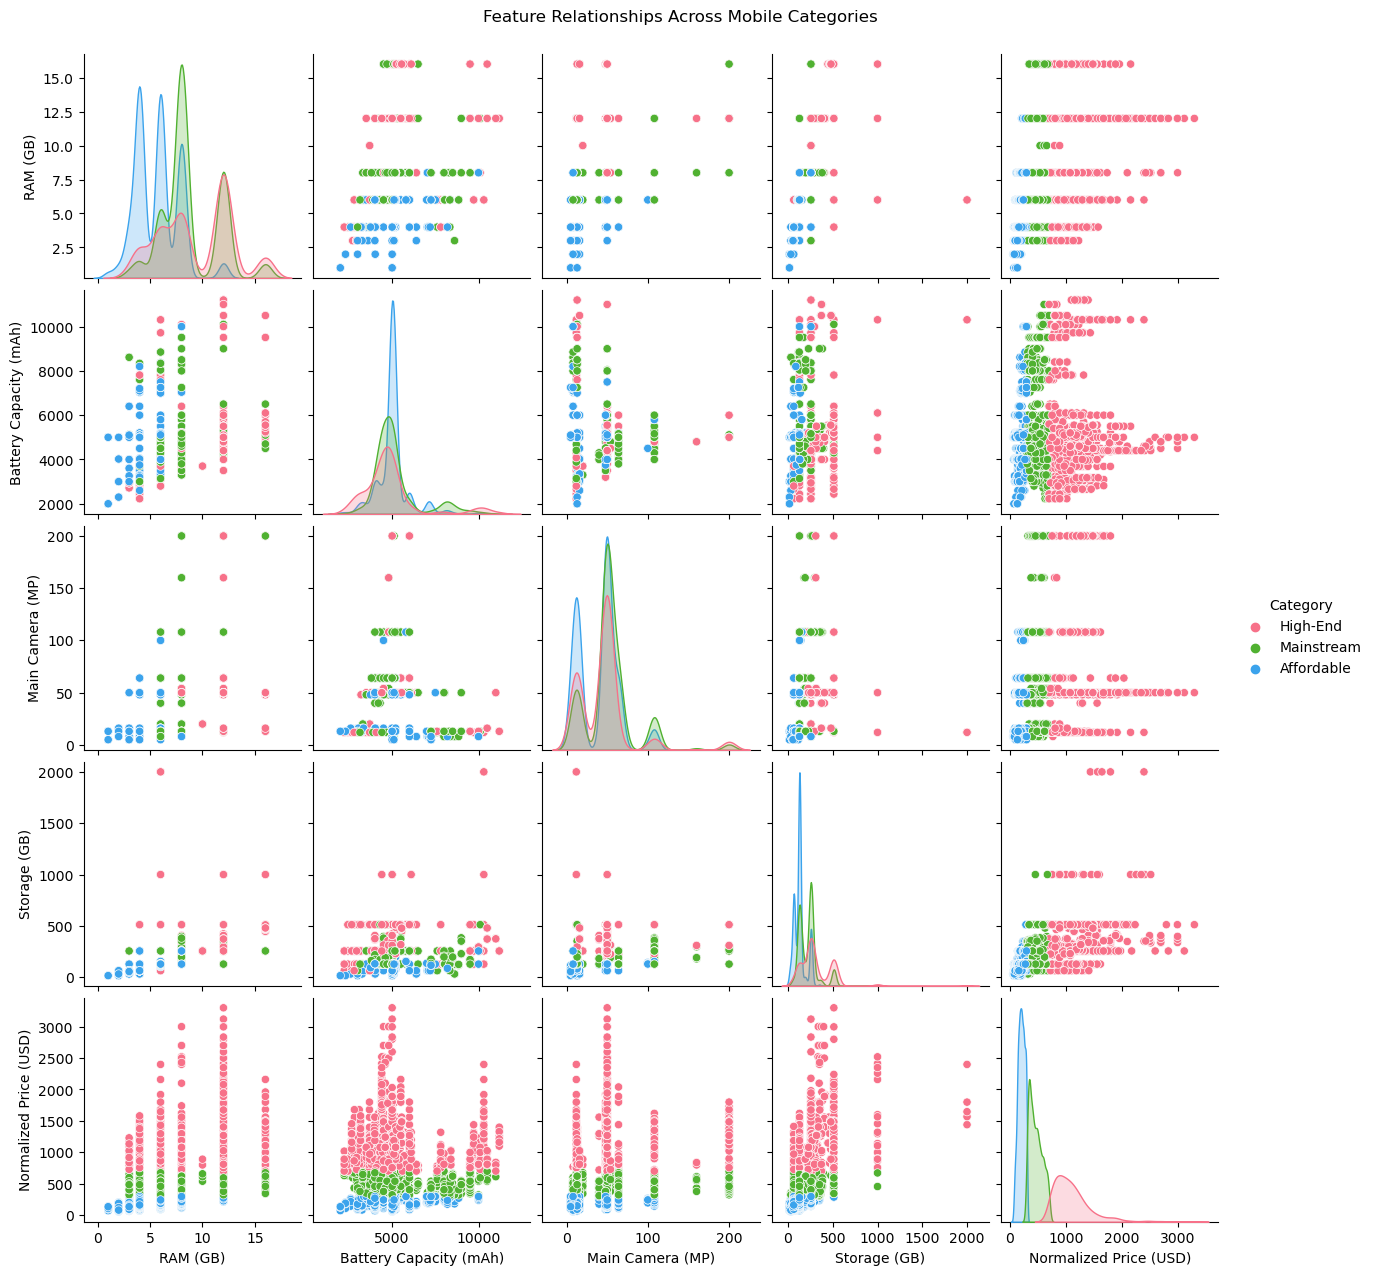

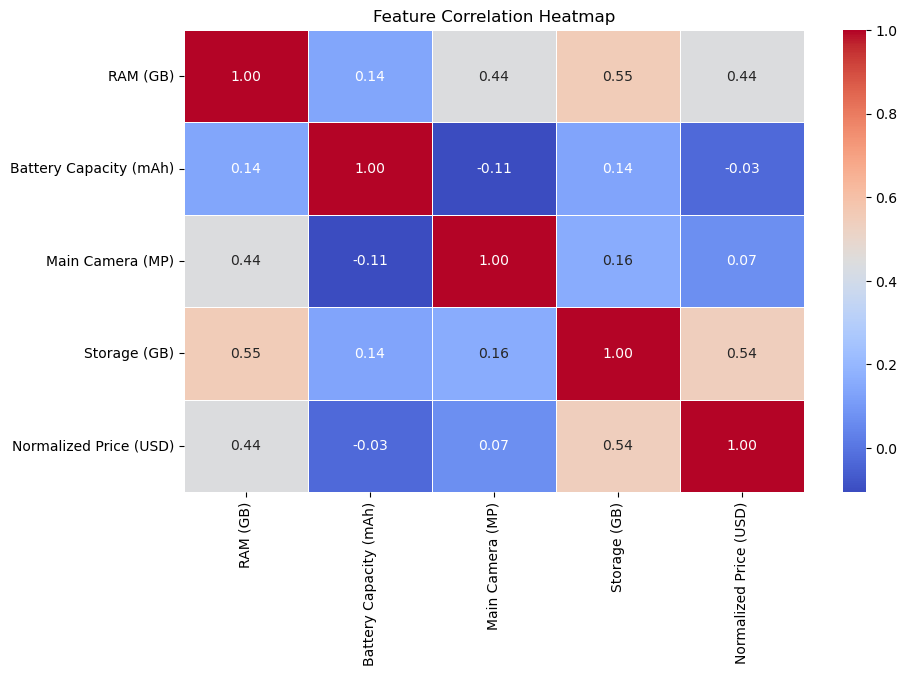

In [43]:
def categorize_price(price):
    if price < 300:
        return "Affordable"
    elif 300 <= price <= 700:
        return "Mainstream"
    else:
        return "High-End"

# Apply function to create the Category column
df["Category"] = df["Normalized Price (USD)"].apply(categorize_price)


# Pairplot for wider relationships
sns.pairplot(df, vars=["RAM (GB)", "Battery Capacity (mAh)", "Main Camera (MP)", "Storage (GB)", "Normalized Price (USD)"],
             hue="Category", palette="husl", diag_kind="kde")
plt.suptitle("Feature Relationships Across Mobile Categories", y=1.02)
plt.show()

# Heatmap for correlations
plt.figure(figsize=(10,6))
sns.heatmap(df[["RAM (GB)", "Battery Capacity (mAh)", "Main Camera (MP)", "Storage (GB)", "Normalized Price (USD)"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [44]:
df = df.dropna()

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Company Name'] = label_encoder.fit_transform(df['Company Name'])
df['Model Name'] = label_encoder.fit_transform(df['Model Name'])
df['Processor'] = label_encoder.fit_transform(df['Processor'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Category'] = label_encoder.fit_transform(df['Category'])

# Features and target variable
X = df[['Company Name', 'Model Name', 'Processor', 'Launched Year', 'Mobile Weight (g)', 
        'RAM (GB)', 'Front Camera (MP)', 'Main Camera (MP)', 'Ultra-wide Camera (MP)', 
        'Telephoto Camera (MP)', 'Macro Camera (MP)', 'Battery Capacity (mAh)', 
        'Screen Size (inches)', 'Storage (GB)', 'Country', 'Specs Score', 'Specs-to-Price Ratio', 'Category']]

y = df['Normalized Price (USD)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=0.3, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         alpha=10, 
                         n_estimators=1000)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 25.648833429647844
R²: 0.996139152123154


        Actual    Predicted
1643   899.988   917.109741
3554  1299.000  1248.697998
3066   349.000   360.421631
3407  1599.000  1616.278809
2554    76.860    77.468674


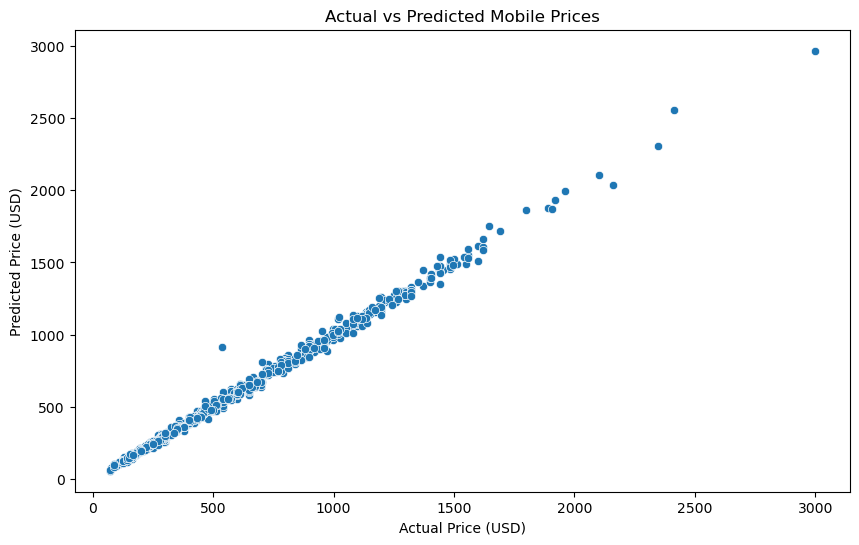

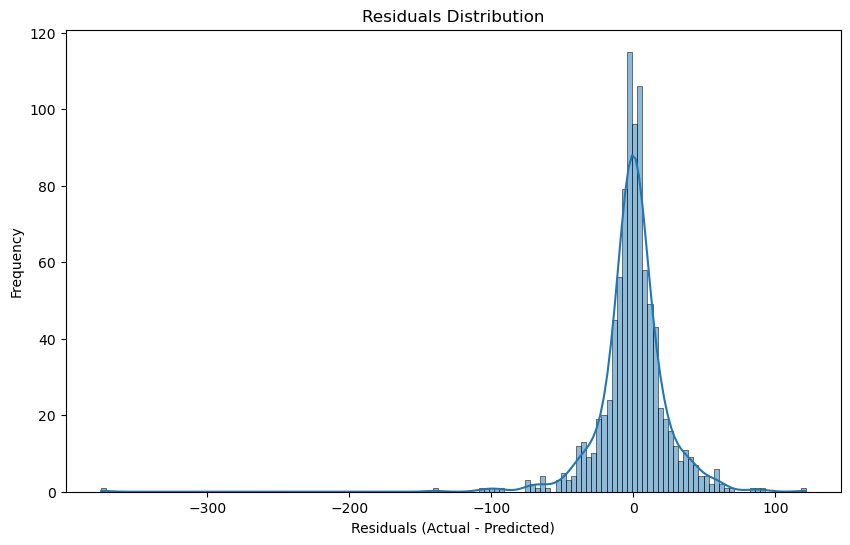

In [45]:
y_pred = model.predict(X_test)

# Combine actual and predicted values in a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows
print(results.head())

# Plot Actual vs Predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(x='Actual', y='Predicted', data=results)
plt.title('Actual vs Predicted Mobile Prices')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.show()

# Optional: Visualize the residuals (difference between actual and predicted prices)
results['Residuals'] = results['Actual'] - results['Predicted']
plt.figure(figsize=(10,6))
sns.histplot(results['Residuals'], kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()